In [1]:
import json
import Constants
from PIL import Image
import pandas as pd

In [56]:
SCENE_GRAPH_PATH = Constants.ROOT_DIR / 'GraphVQA' / 'sceneGraphs'
QUESTIONS_PATH = Constants.ROOT_DIR / 'GraphVQA' / 'questions'
IMAGES_PATH = Constants.ROOT_DIR / 'GraphVQA' / 'images'
OBJECTS_PATH = Constants.ROOT_DIR / 'GraphVQA' / 'meta_info' / 'objects.json'

In [3]:
with open(QUESTIONS_PATH / 'val_balanced_programs.json') as f:
    questions_dict = json.load(f)

In [4]:
len(questions_dict)

132062

In [5]:
with open(SCENE_GRAPH_PATH / 'val_sceneGraphs.json') as f:
    scenegraph_dict = json.load(f)

In [60]:
with open(OBJECTS_PATH) as f:
    objects = json.load(f)
len(objects)

600

In [12]:
scenegraph_dict['2331963']['objects']

{'3205899': {'name': 'helmet',
  'h': 35,
  'relations': [{'object': '3714444', 'name': 'to the right of'},
   {'object': '3017557', 'name': 'to the right of'},
   {'object': '3714445', 'name': 'to the right of'},
   {'object': '3086686', 'name': 'to the right of'}],
  'w': 46,
  'attributes': ['light blue'],
  'y': 135,
  'x': 276},
 '3000194': {'name': 'catcher',
  'h': 134,
  'relations': [{'object': '2939553', 'name': 'to the right of'},
   {'object': '2964742', 'name': 'to the left of'},
   {'object': '2894403', 'name': 'to the left of'}],
  'w': 108,
  'attributes': [],
  'y': 187,
  'x': 26},
 '3446089': {'name': 'shoes',
  'h': 17,
  'relations': [],
  'w': 24,
  'attributes': ['black'],
  'y': 286,
  'x': 334},
 '3293959': {'name': 'jersey',
  'h': 56,
  'relations': [{'object': '3086686', 'name': 'to the right of'},
   {'object': '2715079', 'name': 'to the right of'},
   {'object': '2870210', 'name': 'to the right of'},
   {'object': '3017557', 'name': 'to the right of'},
   

In [20]:
scenegraph_dict['2331963']['objects']['3714444']

{'name': 'stick',
 'h': 49,
 'relations': [{'object': '3017557', 'name': 'to the right of'},
  {'object': '3205899', 'name': 'to the left of'},
  {'object': '3086686', 'name': 'to the right of'},
  {'object': '3293959', 'name': 'to the left of'},
  {'object': '2870210', 'name': 'to the right of'},
  {'object': '2894404', 'name': 'to the left of'},
  {'object': '2715079', 'name': 'to the right of'}],
 'w': 24,
 'attributes': [],
 'y': 142,
 'x': 243}

In [42]:
questions_dict[1]

['2331963',
 'What color is the helmet in the middle of the image?',
 [],
 '17197213',
 'light blue',
 'The helmet is light blue.',
 ['select',
  '(',
  'helmet',
  ')',
  ';',
  'filter_h',
  '(',
  '[0]',
  ',',
  'middle',
  ')',
  ';',
  'query',
  '(',
  '[1]',
  ',',
  'color',
  ')'],
 {'answer': {}, 'question': {'4': 13}, 'fullAnswer': {'1': 13}},
 [[13], [13], [13]],
 [['select', '(', 'helmet', ')'],
  ['filter_h', '(', '[0]', ',', 'middle', ')'],
  ['query', '(', '[1]', ',', 'color', ')']],
 {'detailed': 'directWhich', 'semantic': 'attr', 'structural': 'query'}]

In [54]:
object_relation_statements = []
scene_graph_objects = scenegraph_dict['2331963']['objects']
for object_id, object_dict in scene_graph_objects.items():
    my_object_name = object_dict['name']
    for attr in object_dict['attributes']:
        statement = f'Description: {attr} {my_object_name}'
        print(statement)

    for relation in object_dict['relations']:
        other_object_name = scene_graph_objects[relation['object']]['name']
        relation_relative = relation['name']
        statement = f'Relation: {my_object_name} {relation_relative} {other_object_name}'
        print(statement)

        for attr in scene_graph_objects[relation['object']]['attributes']:
            statement = f'Description: {attr} {other_object_name}'
            print(statement)

Description: light blue helmet
Relation: helmet to the right of stick
Relation: helmet to the right of bats
Description: aluminum bats
Relation: helmet to the right of stick
Relation: helmet to the right of bats
Relation: catcher to the right of umpire
Description: bending umpire
Relation: catcher to the left of glove
Description: brown glove
Description: baseball glove
Relation: catcher to the left of batter
Description: black shoes
Description: blue jersey
Relation: jersey to the right of bats
Relation: jersey to the right of crate
Description: red crate
Relation: jersey to the right of umbrellas
Description: white umbrellas
Relation: jersey to the right of bats
Description: aluminum bats
Relation: jersey to the right of stick
Relation: jersey to the left of bat
Description: aluminum bat
Relation: jersey to the left of ball
Description: baseball field
Description: light fence
Description: metal fence
Description: chain-link fence
Description: gray fence
Relation: fence around field
D

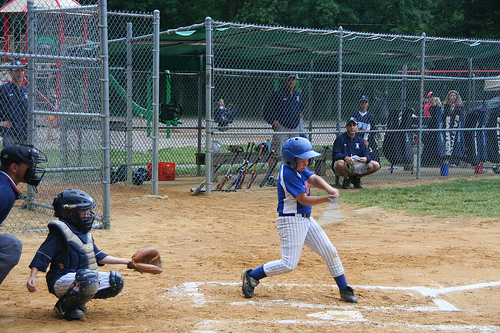

In [36]:
Image.open('./images/2331963.jpg')

In [ ]:
len(questions_dict)

In [ ]:
# image-question-answer tuple
def extract_image_question_answer_dict(questions_dict):
    image_question_answer_dict = {'image_id': [], 'question': [], 'answer_short': [], 'answer_long': []}
    for question_lst in questions_dict:
        image_id = question_lst[0]
        question = question_lst[1]
        answer_short = question_lst[4]
        answer_long = question_lst[5]
    
        image_question_answer_dict['image_id'].append(image_id)
        image_question_answer_dict['question'].append(question)
        image_question_answer_dict['answer_short'].append(answer_short)
        image_question_answer_dict['answer_long'].append(answer_long)
    return image_question_answer_dict
image_question_answer_dict = extract_image_question_answer_dict(questions_dict)

pd.DataFrame(image_question_answer_dict).to_csv('./meta_info/val_image_question_answer.csv')

In [ ]:
df_image_question_answer = pd.read_csv('./meta_info/val_image_question_answer.csv', index_col=0)
for image_id, question, answer_short, answer_long in  df_image_question_answer.iloc:
    print(image_id)

In [ ]:
# image-object-attribute_tuple
image_object_attribute_lst = []
for image_id, scene_graph in scenegraph_dict.items():
    image_object_dict['image_id'] = image_id
    object_lst =  []
    for object_id, object_attributes in scene_graph['objects'].items():
        print(object_attributes['name'], object_attributes['attributes'])
        if len(object_attributes['attributes']) == 0:
            image_object_attribute_lst.append((image_id, object_attributes['name'], None))
        else:
            for object_attr in object_attributes['attributes']:
                image_object_attribute_lst.append({image_id: (object_attributes['name'], object_attr))
        # object_lst.append(object_attr['name'])
    break
image_object_attribute_lst

In [ ]:
scene_graph['objects']